In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Rainfall_data.csv')

In [3]:
df.head()

,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes


In [4]:
df.tail()

,Index,Temperature,Humidity%,Rain
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No
19999,19999,22,64.8,No


In [5]:
df.drop(columns=['Index'], inplace=True)

In [6]:
df.head()

,Temperature,Humidity%,Rain
0,34,74.2,Yes
1,19,68.2,No
2,28,67.2,Yes
3,29,66.6,Yes
4,26,57.9,Yes


In [7]:
df.tail()

,Temperature,Humidity%,Rain
19995,30,77.9,Yes
19996,20,74.8,Yes
19997,14,69.4,No
19998,20,60.6,No
19999,22,64.8,No


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
inp = df[['Temperature', 'Humidity%']]
out = df[['Rain']]

inp_x, tst_x, out_y, tst_y = train_test_split(inp, out, test_size=0.05)

In [10]:
from sklearn.tree import DecisionTreeClassifier

classfier_model = DecisionTreeClassifier()
classfier_model.fit(inp_x, out_y)

DecisionTreeClassifier()

In [11]:
pred_y = classfier_model.predict(tst_x)

In [12]:
cmp = pd.DataFrame({'Actual Values': tst_y.values.flatten(), 'Predicted Values': pred_y.flatten()})
cmp

,Actual Values,Predicted Values
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,No,No
...,...,...
995,Yes,Yes
996,Yes,Yes
997,No,No
998,No,No


In [13]:
from sklearn.preprocessing import LabelEncoder

RainEncoder = LabelEncoder()
RainEncoder.fit(['Yes', 'No'])

LabelEncoder()

In [14]:
cmp['Actual Values'] = RainEncoder.transform(cmp['Actual Values'])
cmp['Predicted Values'] = RainEncoder.transform(cmp['Predicted Values'])
cmp

,Actual Values,Predicted Values
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
995,1,1
996,1,1
997,0,0
998,0,0


<AxesSubplot:ylabel='Density'>

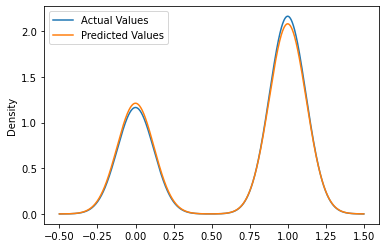

In [15]:
cmp.plot(kind='density')

In [16]:
from sklearn.metrics import accuracy_score

print('Accuracy %:', accuracy_score(tst_y, pred_y) * 100)

Accuracy %: 89.0
